<a href="https://colab.research.google.com/github/janani-1408/ml_projects/blob/main/machine_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Linear Regression using Gradient Descent algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Load the dataset
df = pd.read_csv("/content/Housing.csv")

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
unwanted_columns=['bathrooms','stories','mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']
dataset=df.drop(unwanted_columns,axis=1)

In [ ]:
dataset.head()

,price,area,bedrooms
0,13300000,7420,4
1,12250000,8960,4
2,12250000,9960,3
3,12215000,7500,4
4,11410000,7420,4


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   price     545 non-null    int64
 1   area      545 non-null    int64
 2   bedrooms  545 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


In [ ]:
dataset.shape

(545, 3)

In [ ]:
dataset.columns

Index(['price', 'area', 'bedrooms'], dtype='object')

In [ ]:
x_columns=['area','bedrooms']
x= dataset[x_columns]
y = dataset['price']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=101)

In [ ]:
# Fit simple linear regression to the Training Set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.predict([[3000,4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4498588.30937985])

In [ ]:
x1=df['area'].values.reshape(-1,1)
y1=df['price'].values

In [ ]:
# Normalize features
x1 = (x1 - np.mean(x1)) / np.std(x1)

In [ ]:
# Add intercept term
X_b = np.c_[np.ones((len(x1), 1)),x1]

In [ ]:
# Gradient Descent Parameters
alpha = 0.01
num_iterations = 1000
theta = np.zeros(X_b.shape[1])
def gradient_descent(x1, y, theta, alpha, num_iterations):
 m = len(x1)
 for i in range(num_iterations):
 # Calculate the predicted values
    predictions = np.dot(x1, theta)
 # Calculate the error
    error = predictions - y
 # Update theta using gradient descent
    gradient = (1/m) * np.dot(x1.T, error)
    theta = theta - alpha * gradient
 return theta

In [ ]:
# Perform Gradient Descent
theta = gradient_descent(X_b, y, theta, alpha, num_iterations)

In [ ]:
# Calculate the line of best fit
line_of_best_fit = theta[0] + theta[1] * x1

In [ ]:
# Print the final theta values
print('Optimal theta values:', theta)

Optimal theta values: [4766523.46205873 1001587.23423615]


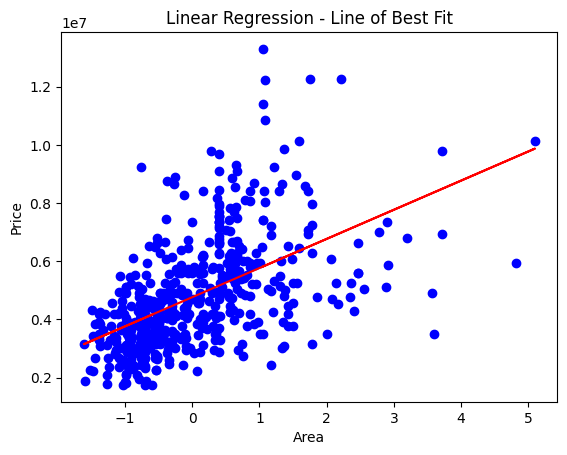

In [ ]:
# Plot the data and the line of best fit
plt.scatter(x1, y, color='blue')
plt.plot(x1, line_of_best_fit, color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression - Line of Best Fit')
plt.show()